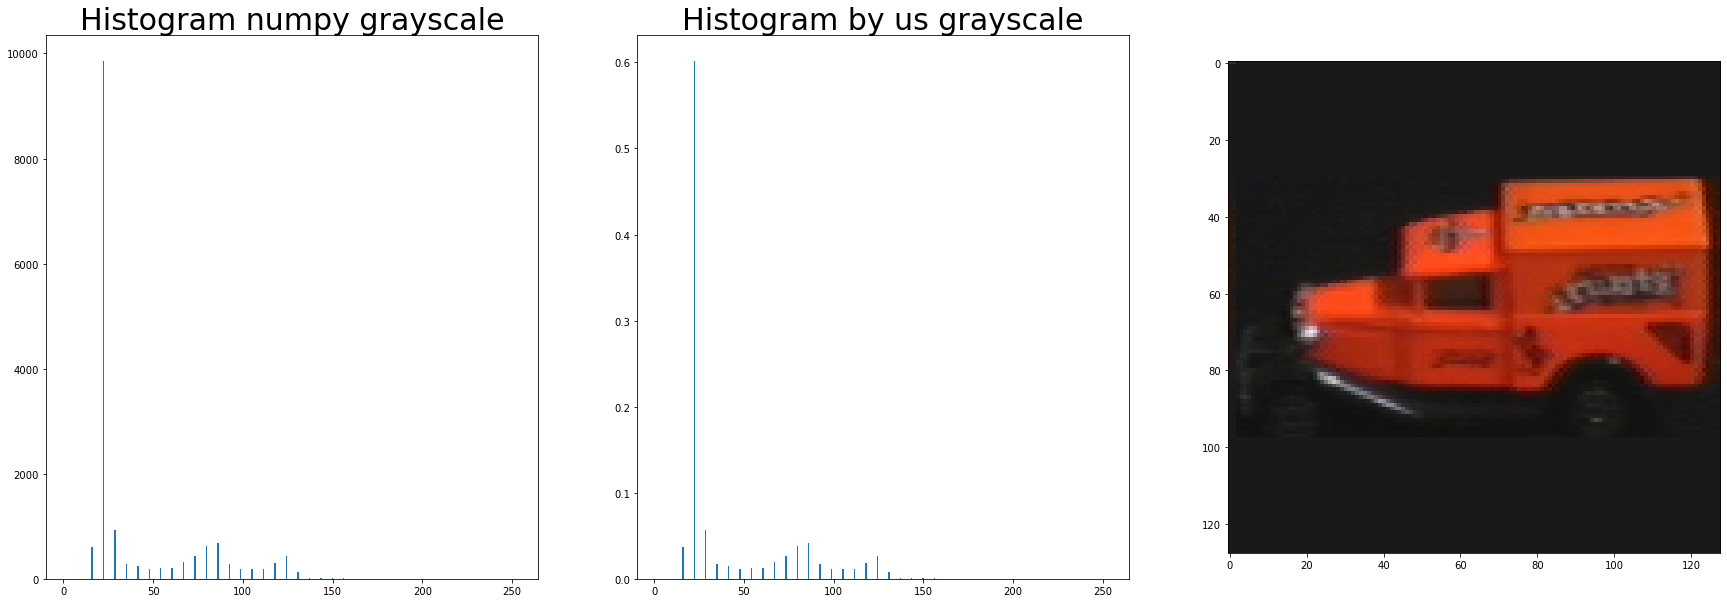

In [21]:
# import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist  # call hist, otherwise np.histogram
import matplotlib.pyplot as plt

import histogram_module
import dist_module
import gauss_module
import match_module
import rpc_module



def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray






## gray-value histograms (Question 2.a)

img_color = np.array(Image.open('./model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
num_bins_gray = 40
plt.title('Histogram numpy grayscale', fontsize = 30)
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0, 255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

plt.subplot(1,3,2)
plt.title('Histogram by us grayscale', fontsize = 30)
hist_gray2, bin_gray2 = histogram_module.normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)

#plt.show()

plt.subplot(1,3,3)
plt.imshow(img_color)
plt.savefig('Histogram_gray')

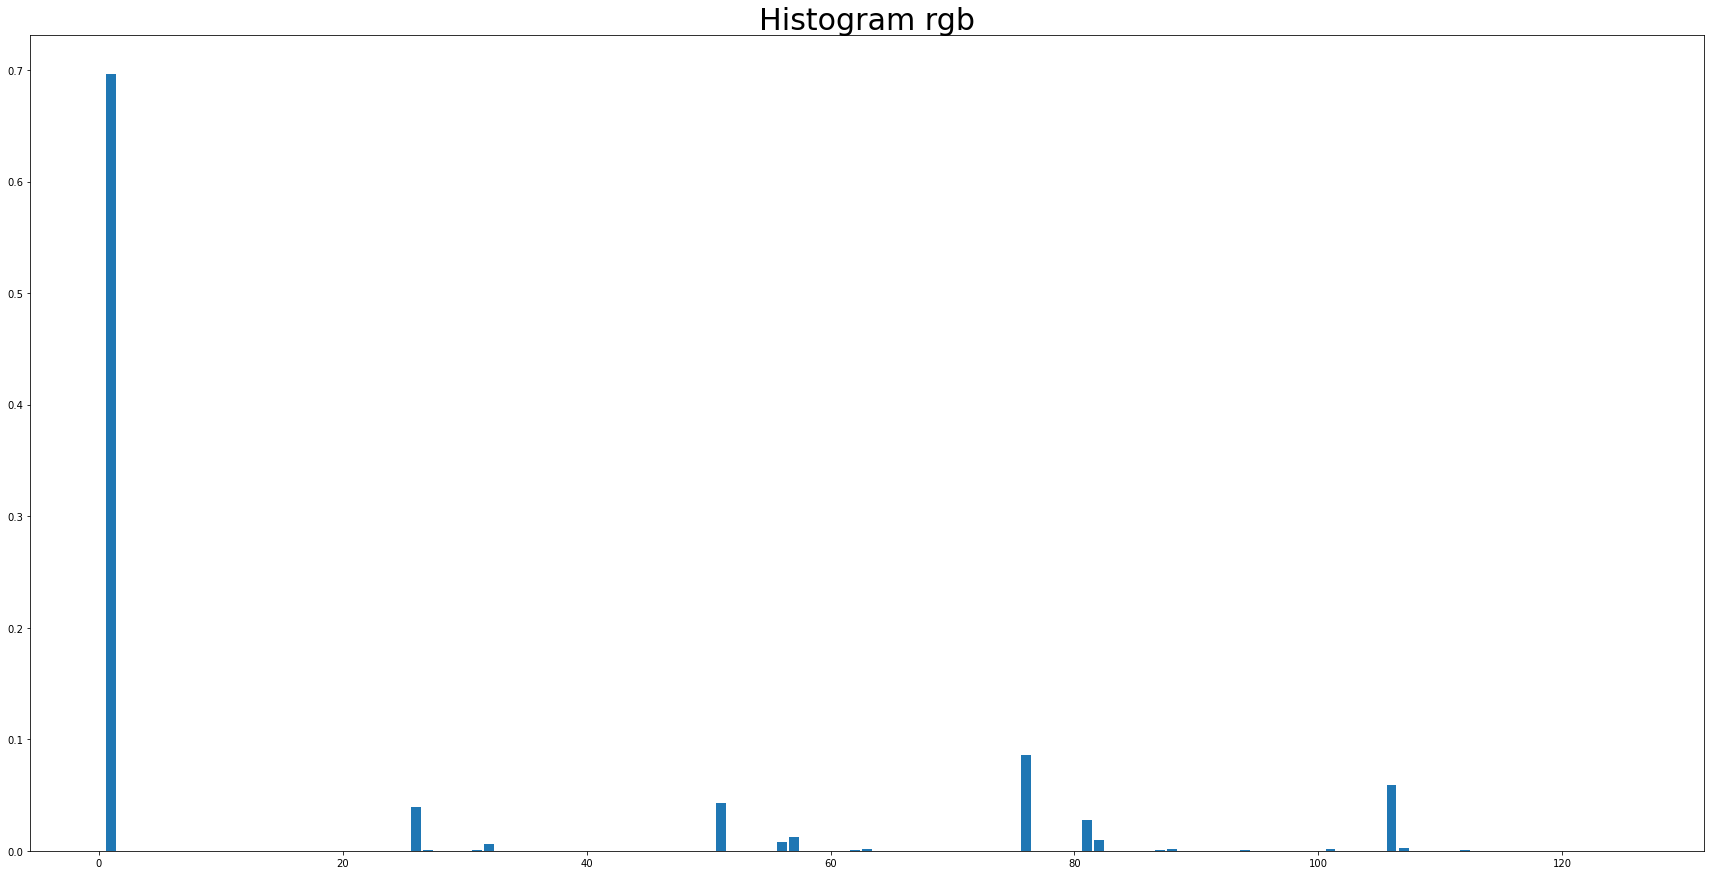

In [12]:
plt.figure(figsize = (30, 15))

num_bins_color = 5
plt.title('Histogram rgb', fontsize = 30)
hist_rgb = histogram_module.rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb.size+1)),hist_rgb)
plt.savefig('Histogram_rgb')
plt.show()

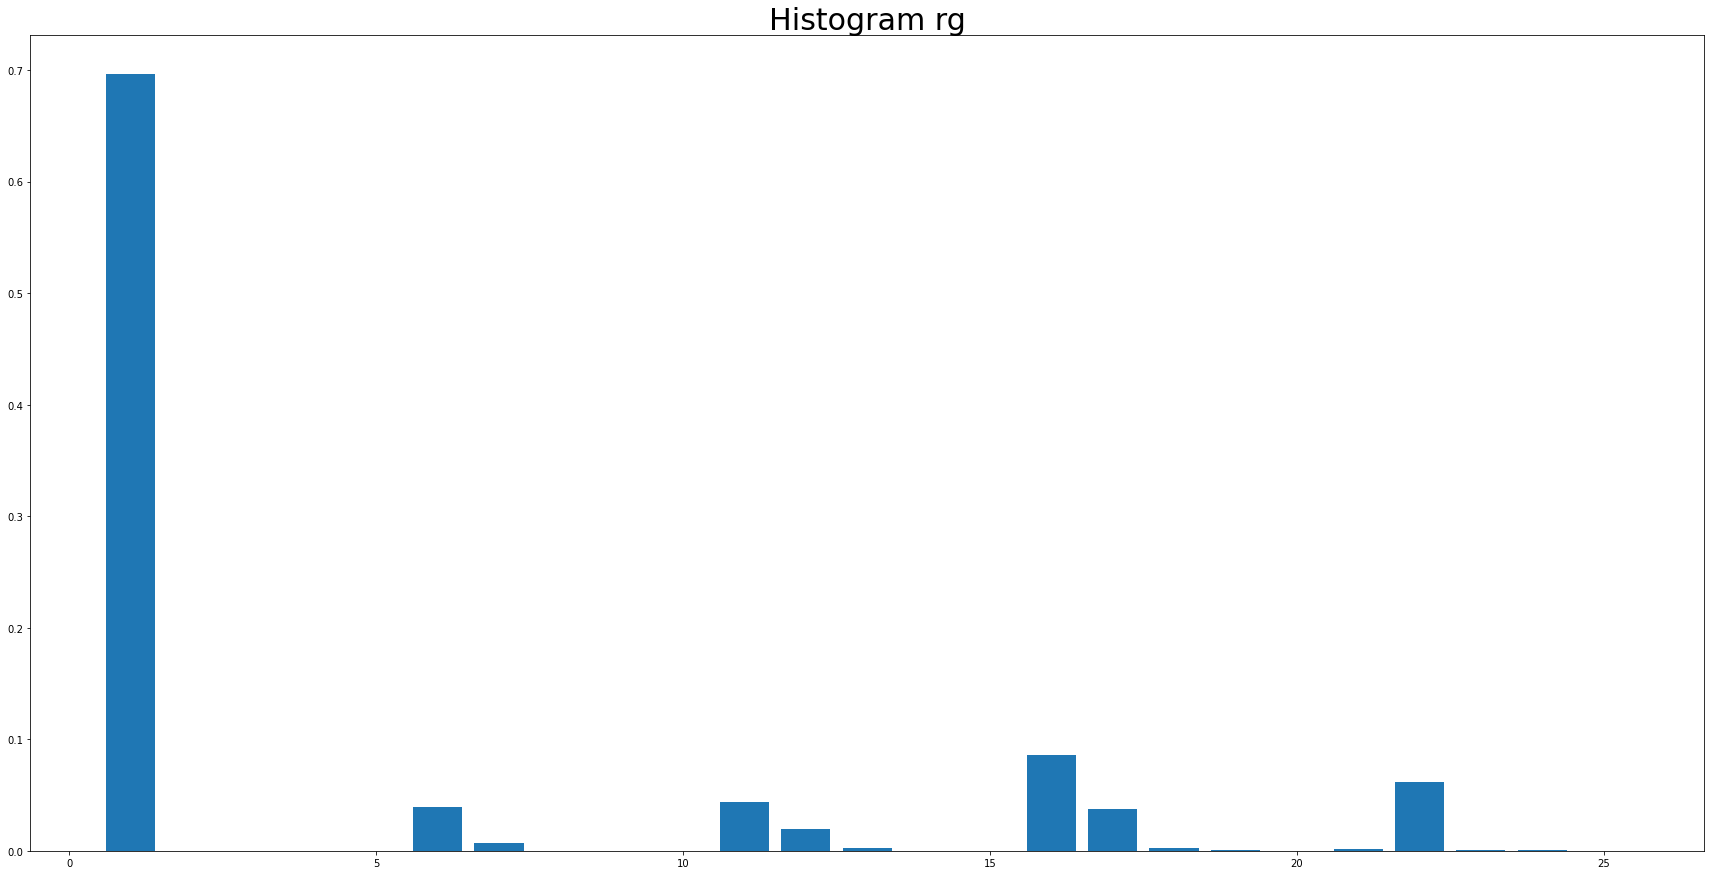

In [13]:
plt.figure(figsize = (30, 15))

num_bins_color = 5
plt.title('Histogram rg', fontsize = 30)
hist_rg = histogram_module.rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.savefig('Histogram_rg')
plt.show()

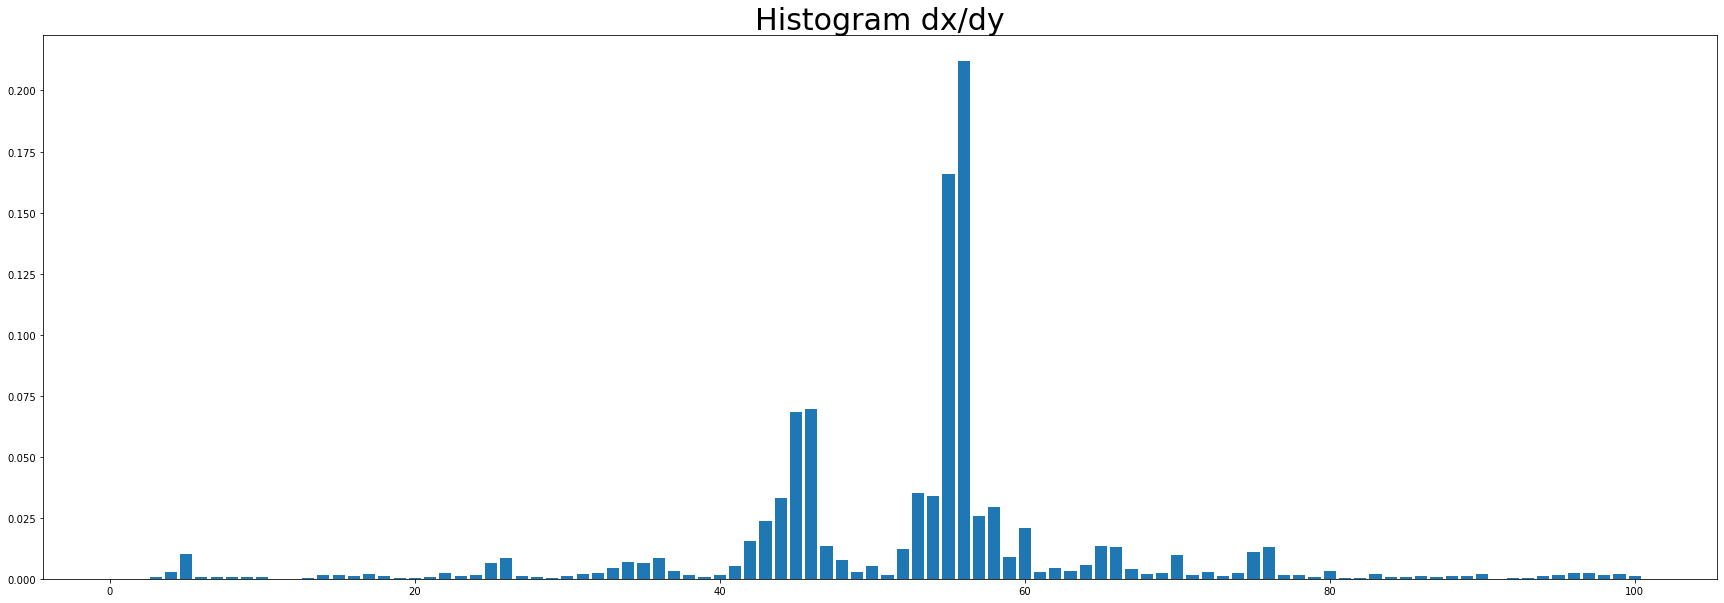

In [14]:
plt.figure(figsize = (30, 10))

num_bins_dxdy = 10
plt.title('Histogram dx/dy', fontsize = 30)
hist_dxdy = histogram_module.dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.savefig('Histogram_dx_dy')
plt.show()

In [25]:
def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    img_vector = img_gray.reshape(img_gray.size)

    n = 255 / num_bins
    hists = np.zeros(num_bins)

    for el in img_vector:

        if el == 255:
            k = num_bins - 1
        else:
            k = int(el // n)

        hists[k] += 1

    hists = hists / hists.sum()
    bins = np.arange(0, 256, n)

    return hists, bins


def rgb_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'

    n = 255/num_bins

    vector_image = img_color_double.reshape(img_color_double.shape[0] * img_color_double.shape[1], 3)

    true_bins = np.arange(0, 255, n)

    #Define a 3D histogram  with "num_bins^3" number of entries
    hists = np.zeros((num_bins, num_bins, num_bins))
    
    # Loop for each pixel i in the image 
    for i in range(img_color_double.shape[0] * img_color_double.shape[1]):

        for j in range(len(vector_image[i])):

            if vector_image[i, j] == 255:
                k = num_bins - 1
            else:
                k = int(vector_image[i, j] // n)

            if j == 0:
                R = k
            elif j == 1:
                G = k
            else:
                B = k

        hists[R, G, B] += 1

        pass


    #Normalize the histogram such that its integral (sum) is equal 1
    hists = hists / hists.sum()

    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists

def rg_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'

    n = 255/num_bins

    vector_image = img_color_double.reshape(img_color_double.shape[0] * img_color_double.shape[1], 3)
    true_bins = np.arange(0, 255, n)

    # Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))

    for i in range(img_color_double.shape[0] * img_color_double.shape[1]):

        for j in range(len(vector_image[i])):

            if vector_image[i, j] == 255:
                k = num_bins - 1
            else:
                k = int(vector_image[i, j] // n)

            if j == 0:
                R = k
            elif j == 1:
                G = k

        hists[R, G] += 1

    hists = hists / hists.sum()

    # Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)

    return hists


def dxdy_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'


    #.....your code here
    n_of_integers = list(range(-6, 7))
    #n = len(n_of_integers) / num_bins
    n = 12/num_bins
    true_bins = np.arange(-6, 6, n)
    true_bins[-1] = 6.0

    [imgDx, imgDy] = gauss_module.gaussderiv(img_gray, 3.0)
    vector_imgDx = imgDx.reshape(imgDx.size)
    vector_imgDy = imgDy.reshape(imgDy.size)

    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))


    #... (your code here)
    for i in range(imgDx.size):
        
        if vector_imgDx[i] >= 6:
            kx = num_bins - 1
    
        elif vector_imgDx[i] < -6:
            ky = 0
        else:
            kx = int((vector_imgDx[i] + 6) // n)
            
        if vector_imgDy[i] >= 6:
            ky = num_bins - 1

            
        elif vector_imgDy[i] < -6:
            ky = 0
            
        else:
            ky = int((vector_imgDy[i] + 6) // n)
        
    
        hists[kx, ky] += 1

    hists = hists / hists.sum()

    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists

def is_grayvalue_hist(hist_name):
    if hist_name == 'grayvalue' or hist_name == 'dxdy':
        return True
    elif hist_name == 'rgb' or hist_name == 'rg':
        return False
    else:
        assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
    if hist_name == 'grayvalue':
        return normalized_hist(img, num_bins_gray)
    elif hist_name == 'rgb':
        return rgb_hist(img, num_bins_gray)
    elif hist_name == 'rg':
        return rg_hist(img, num_bins_gray)
    elif hist_name == 'dxdy':
        return dxdy_hist(img, num_bins_gray)
    else:
        assert False, 'unknown distance: %s'%hist_name

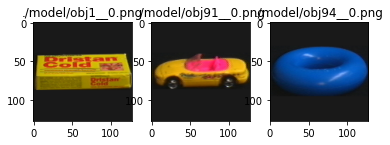

Distance according to dist_l2 0.003344
Distance according to dist_interset 0.293152


TypeError: must be real number, not NoneType

In [5]:
image_files1 = ['./model/obj1__0.png']
image_files2 = ['./model/obj91__0.png', './model/obj94__0.png']

plt.figure()
plt.subplot(1,3,1); plt.imshow(np.array(Image.open(image_files1[0])), vmin=0, vmax=255); plt.title(image_files1[0])
plt.subplot(1,3,2); plt.imshow(np.array(Image.open(image_files2[0])), vmin=0, vmax=255); plt.title(image_files2[0])
plt.subplot(1,3,3); plt.imshow(np.array(Image.open(image_files2[1])), vmin=0, vmax=255); plt.title(image_files2[1])
plt.show()

img1_color = np.array(Image.open(image_files1[0]))
img2_color = np.array(Image.open(image_files2[0]))
num_bins_color = 30
hist1_rgb = histogram_module.rgb_hist(img1_color.astype('double'), num_bins_color)
hist2_rgb = histogram_module.rgb_hist(img2_color.astype('double'), num_bins_color)

print('Distance according to dist_l2 %f'% dist_module.dist_l2(hist1_rgb,hist2_rgb))
print('Distance according to dist_interset %f'% dist_module.dist_intersect(hist1_rgb,hist2_rgb))
print('Distance according to dist_chi2 %f'% dist_module.dist_chi2(hist1_rgb,hist2_rgb))


distance_types = ['l2', 'intersect', 'chi2']
print('distance functions:', distance_types)

hist_types = ['grayvalue', 'rgb', 'rg', 'dxdy']
print('histogram types:', hist_types)

num_bins_color = 30;
num_bins_gray = 90;

for img1_file in image_files1:
    img1_color = np.array(Image.open(img1_file))
    img1_color = img1_color.astype('double')
    img1_gray = rgb2gray(img1_color)
    
    for img2_file in image_files2:
        img2_color = np.array(Image.open(img2_file))
        img2_color = img2_color.astype('double')
        img2_gray = rgb2gray(img2_color)
    
        D = np.zeros( (len(distance_types),len(hist_types)) )
    
        for didx in range(len(distance_types)):
    
            for hidx in range(len(hist_types)):
    
                if histogram_module.is_grayvalue_hist(hist_types[hidx]):
                    hist1 = histogram_module.get_hist_by_name(img1_gray, num_bins_gray, hist_types[hidx])
                    hist2 = histogram_module.get_hist_by_name(img2_gray, num_bins_gray, hist_types[hidx])
            
                else:
                    hist1 = histogram_module.get_hist_by_name(img1_color, num_bins_color, hist_types[hidx])
                    hist2 = histogram_module.get_hist_by_name(img2_color, num_bins_color, hist_types[hidx])
    
                if len(hist1) == 2:
                    hist1 = hist1[0]
                if len(hist2) == 2:
                    hist2 = hist2[0]
    
                D[didx, hidx] = dist_module.get_dist_by_name(hist1, hist2, distance_types[didx])
         
        print('Comparison of images "%s" to "%s":'% (img1_file, img2_file))
        print(D)
        print('\n')


print('Legend:')
print('%s-%s, %s-%s, %s-%s, %s-%s'%('l2', 'grayvalue', 'l2', 'rgb', 'l2', 'rg', 'l2', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('intersect', 'grayvalue', 'intersect', 'rgb', 'intersect', 'rg', 'intersect', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('chi2', 'grayvalue', 'chi2', 'rgb', 'chi2', 'rg', 'chi2', 'dxdy'))


In [24]:
with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images]

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

dist_type = 'intersect';
hist_type = 'rg';
num_bins = 30;

In [26]:
def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):
    hist_isgray = histogram_module.is_grayvalue_hist(hist_type)
    
    model_hists = compute_histograms(model_images, hist_type, hist_isgray, num_bins)
    query_hists = compute_histograms(query_images, hist_type, hist_isgray, num_bins)
    
    D = np.zeros((len(model_images), len(query_images)))
    
    
    #... (your code here)
    best_match = [0]*len(query_hists)

    for i, model in enumerate(model_hists):
        for j, query in enumerate(query_hists):
            if dist_type == 'intersect':
                D[i, j] = dist_intersect(model, query)

            elif dist_type == 'l2':
                D[i, j] = dist_l2(model, query)

            elif dist_type == 'chi2':
                D[i, j] = dist_chi2(model, query)
                
            if i == 0:
                best_match[j] = i
            elif D[i, j] < D[best_match[j], j]:
                best_match[j] = i

    
    return np.array(best_match), D

In [27]:
def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
    
    image_hist = []

    # Compute histogram for each image and add it at the bottom of image_hist

    #... (your code here)
    for path_img in image_list:

        img = np.array(Image.open(path_img))

        if hist_isgray == True:
            img = rgb2gray(img.astype('double'))

        if hist_type == 'grayvalue':
            image_hist.append(np.array(normalized_hist(img, num_bins)[0]))
        elif hist_type == 'rgb':
            image_hist.append(rgb_hist(img.astype('double'), num_bins))
        elif hist_type == 'rg':
            image_hist.append(rg_hist(img.astype('double'), num_bins))
        elif hist_type == 'dxdy':
            image_hist.append(dxdy_hist(img, num_bins))

    return image_hist

In [42]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
    
    plt.figure()
    
    
    num_nearest = 5  # show the top-5 neighbors
    
    #... (your code here)
    best_match, D = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)

    top_k = []

    for col in range(D.shape[1]):
        
        if dist_type == 'intersect':
            
            top_k.append(D[:,col].argsort()[0:num_nearest])
            
        else:
            
            top_k.append(D[:,col].argsort()[-num_nearest:][::-1])
        

    for i, best in enumerate(top_k):
        
        cc = 1
        
        plt.tight_layout()
        
        plt.rcParams["figure.figsize"] = [30,10]
        
        print('Axis for query image:', i)
        
        img_color = np.array(Image.open(query_images[i]))
        ax1 = plt.subplot(i+1, num_nearest+1, cc)
        que = 'Q' + str(i)
        ax1.set_title(que, size=25)
        plt.sca(ax1)
        plt.imshow(img_color, vmin=0, vmax=255)
        
        cc += 1
        for j, img in enumerate(best):
            
      
            
            img_color = np.array(Image.open(model_images[img]))
            ax = plt.subplot(i+1, num_nearest+1, cc)
            title = 'M0.' + str(img)
            ax.set_title(title, size=25)
            plt.sca(ax)
            plt.imshow(img_color, vmin=0, vmax=255)
            cc += 1
        #file = 'Intersect-rgb' + que
        #plt.savefig(file, dpi = 100)
        plt.savefig('Intersect-rgb {}'.format(i), dpi = 100)
        plt.show()
        
    
    plt.close()
    #plt.show()
        

Axis for query image: 0


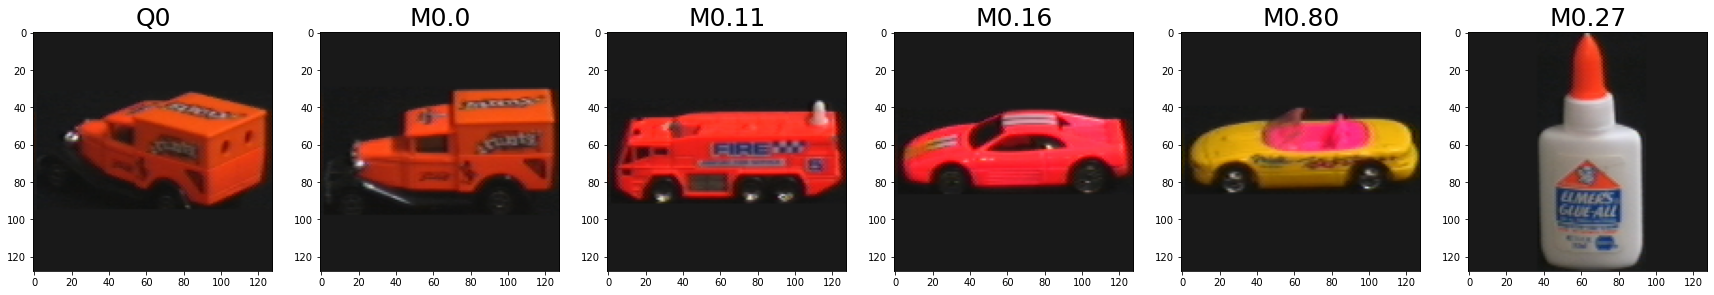

Axis for query image: 1


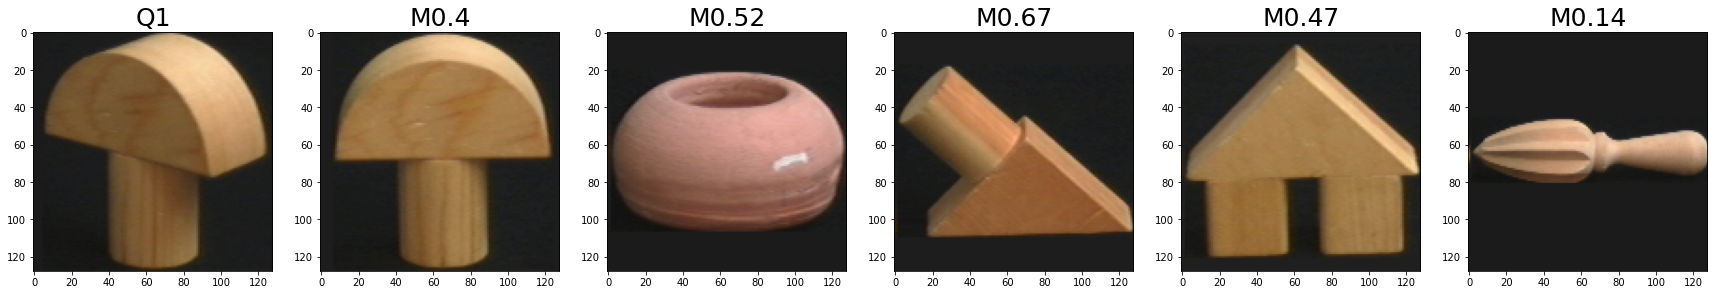

Axis for query image: 2


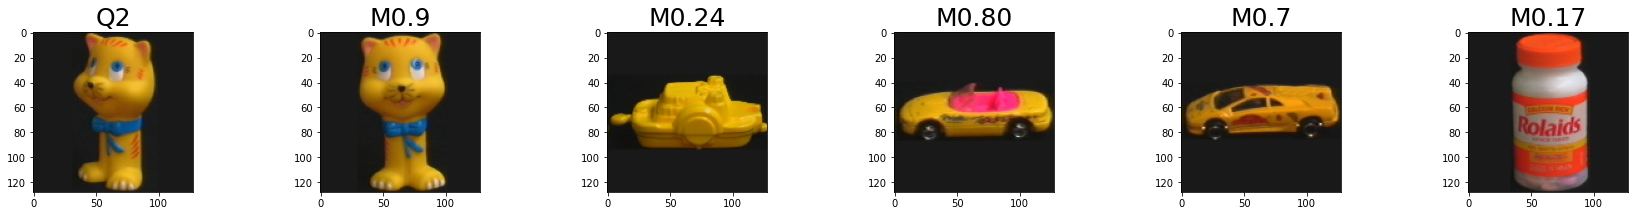

In [43]:
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

In [51]:
histograms = ['grayvalue', 'rgb', 'rg', 'dxdy']
distances = ['chi2', 'l2', 'intersect']
n_bins = [3, 10, 20]

In [52]:
combinations = []
rates = []
correct = []

for hist_type in histograms:
    
    for dist_type in distances:
        
        for num_bins in n_bins:
            
            print(hist_type + '-' + dist_type + '-bins ' + str(num_bins))
            
            [best_match, D] = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)
            num_correct = sum( best_match == range(len(query_images)) )
            recognition_rate = round(num_correct / len(query_images), 4)
            correct.append(num_correct)
            print('Correct: {}, Recognition rate: {}\n'.format(num_correct, recognition_rate)
            combinations.append(hist_type + '-' + dist_type + '-' + str(num_bins))
            rates.append(recognition_rate)

grayvalue-chi2-bins 3
Correct: 22, Recognition rate: 0.24719101123595505

grayvalue-chi2-bins 10
Correct: 47, Recognition rate: 0.5280898876404494

grayvalue-chi2-bins 20
Correct: 48, Recognition rate: 0.5393258426966292

grayvalue-l2-bins 3
Correct: 19, Recognition rate: 0.21348314606741572

grayvalue-l2-bins 10
Correct: 39, Recognition rate: 0.43820224719101125

grayvalue-l2-bins 20
Correct: 34, Recognition rate: 0.38202247191011235

grayvalue-intersect-bins 3
Correct: 20, Recognition rate: 0.2247191011235955

grayvalue-intersect-bins 10
Correct: 45, Recognition rate: 0.5056179775280899

grayvalue-intersect-bins 20
Correct: 46, Recognition rate: 0.5168539325842697

rgb-chi2-bins 3
Correct: 70, Recognition rate: 0.7865168539325843

rgb-chi2-bins 10
Correct: 69, Recognition rate: 0.7752808988764045

rgb-chi2-bins 20
Correct: 71, Recognition rate: 0.797752808988764

rgb-l2-bins 3
Correct: 57, Recognition rate: 0.6404494382022472

rgb-l2-bins 10
Correct: 54, Recognition rate: 0.606741573

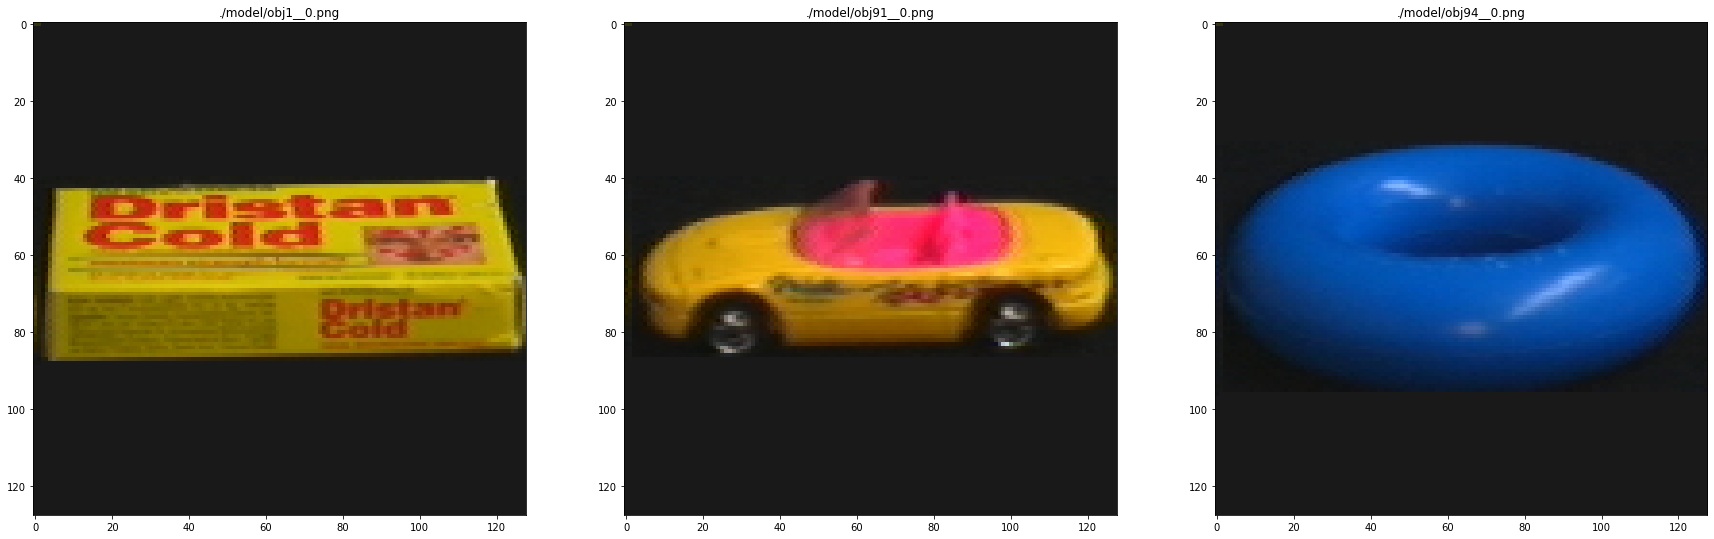

In [21]:
image_files1 = ['./model/obj1__0.png']
image_files2 = ['./model/obj91__0.png', './model/obj94__0.png']

plt.figure()
plt.subplot(1,3,1); plt.imshow(np.array(Image.open(image_files1[0])), vmin=0, vmax=255); plt.title(image_files1[0])
plt.subplot(1,3,2); plt.imshow(np.array(Image.open(image_files2[0])), vmin=0, vmax=255); plt.title(image_files2[0])
plt.subplot(1,3,3); plt.imshow(np.array(Image.open(image_files2[1])), vmin=0, vmax=255); plt.title(image_files2[1])
plt.show()

img1_color = np.array(Image.open(image_files1[0]))
img2_color = np.array(Image.open(image_files2[0]))
num_bins_color = 30
hist1_rgb = rgb_hist(img1_color.astype('double'), num_bins_color)
hist2_rgb = rgb_hist(img2_color.astype('double'), num_bins_color)

In [29]:
def dist_intersect(x,y):
    
    minima = []
    
    for i in range(len(x)):
        
        minima.append(min(x[i], y[i]))
        
    intersect = 1/2*(np.array(minima).sum()/x.sum() + np.array(minima).sum()/y.sum())
    
    result = 1 - intersect
    
    return result

In [7]:
print('Distance according to dist_interset %f'% dist_intersect(hist1_rgb, hist2_rgb))

Distance according to dist_interset 0.293152


In [30]:
def dist_l2(x, y):
    
    l2_distance = ((x - y)**2).sum()
    
    return l2_distance

In [15]:
print('Distance according to dist_l2 %f'% dist_l2(hist1_rgb, hist2_rgb))

Distance according to dist_l2 0.003344


In [31]:
def dist_chi2(x,y):
    
    #num = (x - y)**2
    #den = x + y

    chi2_distance = 0
    
    for i in range(len(x)):
        #if (x[i] + y[i]) == 0 and ((x[i] - y[i])**2) == 0:
        if x[i] > 0 or y[i] > 0:
            chi2_distance += (((x[i] - y[i])**2))/(x[i] + y[i])
        else:
            chi2_distance += 0
        #elif (x[i] + y[i]) == 0 and ((x[i] - y[i])**2) != 0:
            #return np.inf
        #else:
            #chi2_distance.append((((x[i] - y[i])**2))/(x[i] + y[i]))
    
    #chi2_distance = np.array(chi2_distance).sum()
    
    return chi2_distance

In [71]:
def dist_chi2_1(x,y):
    
    num = (x - y)**2
    den = x + y
    
    chi2_distance = np.divide(num, den, out=np.zeros_like(num), where=den != 0).sum()
    
    return chi2_distance

In [138]:
print('Distance according to dist_chi2 %f'% dist_chi2(hist1_rgb, hist2_rgb))

Distance according to dist_chi2 0.502249


In [53]:
def plot_rpc(D, plot_color):
    
    recall = []
    precision = []
    num_queries = D.shape[1]
    
    num_images = D.shape[0]
    assert(num_images == num_queries), 'Distance matrix should be a square matrix'
    
    labels = np.diag([1]*num_images)
      
    d = D.reshape(D.size)
    l = labels.reshape(labels.size)
     
    sortidx = d.argsort()
    d = d[sortidx]
    l = l[sortidx]
    
    tp = 0

    #... (your code here)
    unique, counts = np.unique(l, return_counts=True)
    counter = dict(zip(unique, counts))

    true_actual = counter[1]
    false_actual = counter[0]

    for idt in range(len(d)):
        tp += l[idt]
        #... (your code here)
        
        #Compute precision and recall values and append them to "recall" and "precision" vectors
        #... (your code here)
        precision.append(tp/(idt+1))
        recall.append(tp/true_actual)
    
    plt.plot([1 - i for i in precision], recall, plot_color+'-')



def compare_dist_rpc(model_images, query_images, dist_types, hist_type, num_bins, plot_colors):
    
    assert len(plot_colors) == len(dist_types), 'number of distance types should match the requested plot colors'

    for idx in range( len(dist_types) ):

        [best_match, D] = find_best_match(model_images, query_images, dist_types[idx], hist_type, num_bins)

        plot_rpc(D, plot_colors[idx])
    

    plt.axis([0, 1, 0, 1]);
    plt.xlabel('1 - precision');
    plt.ylabel('recall');
    
    # legend(dist_types, 'Location', 'Best')
    
    plt.legend( dist_types, loc='best')

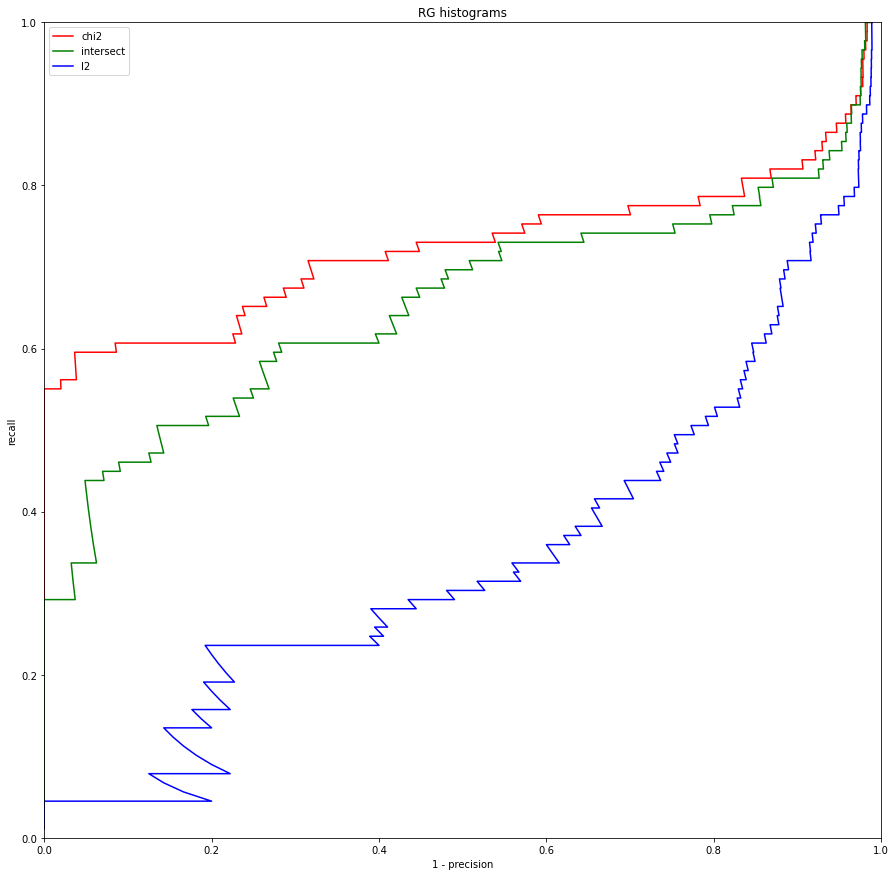

In [17]:
with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

num_bins = 20;


plt.figure(figsize = (15, 15))
compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rg', num_bins, ['r', 'g', 'b'])
plt.title('RG histograms')
plt.show()

grayvalue histograms 3 bins DONE
grayvalue histograms 10 bins DONE
grayvalue histograms 20 bins DONE


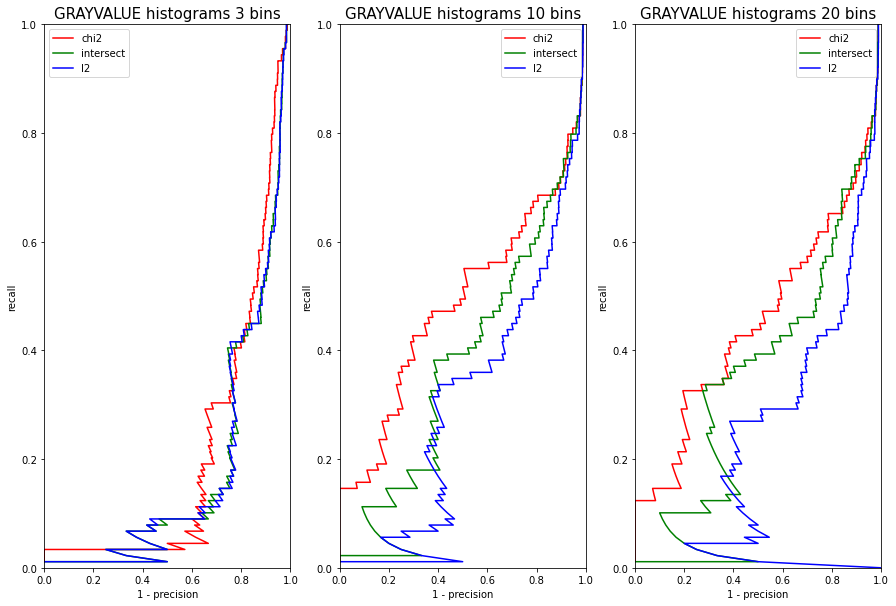

rgb histograms 3 bins DONE
rgb histograms 10 bins DONE
rgb histograms 20 bins DONE


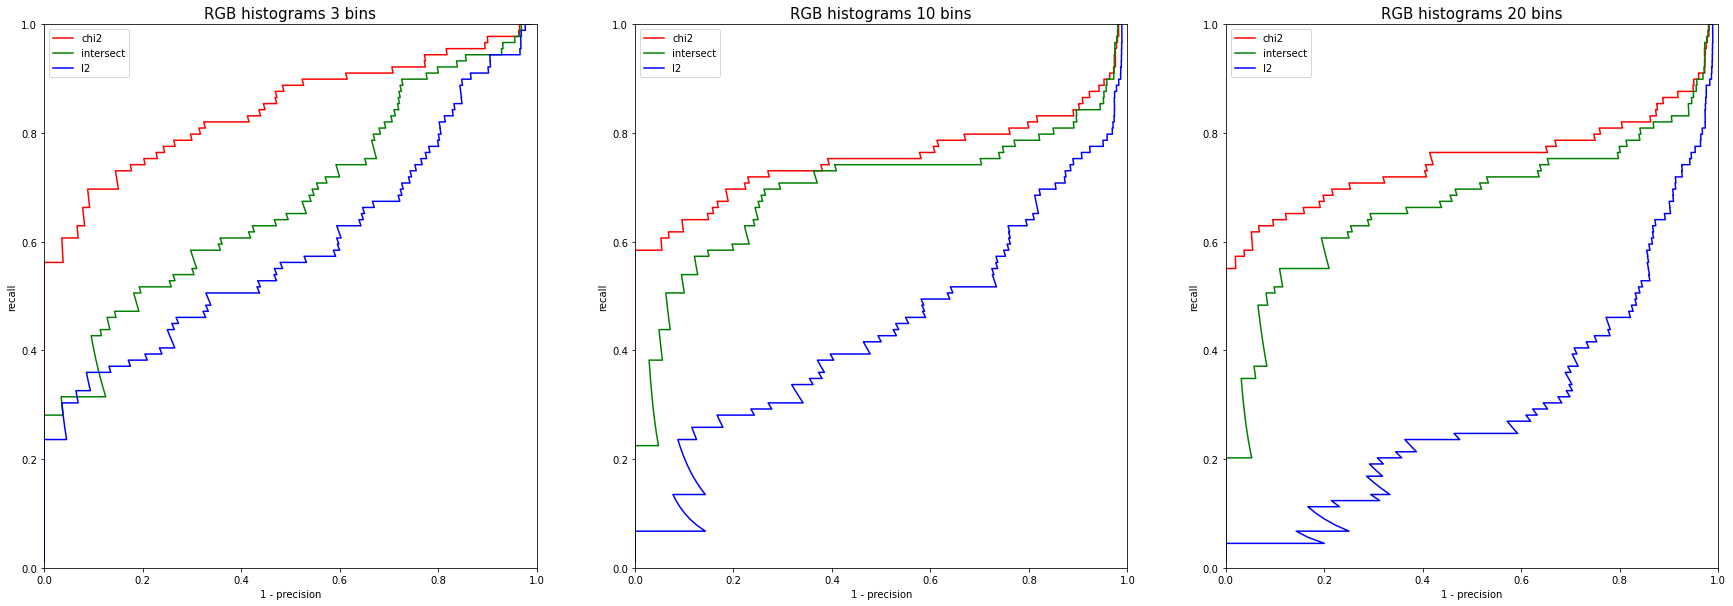

rg histograms 3 bins DONE
rg histograms 10 bins DONE
rg histograms 20 bins DONE


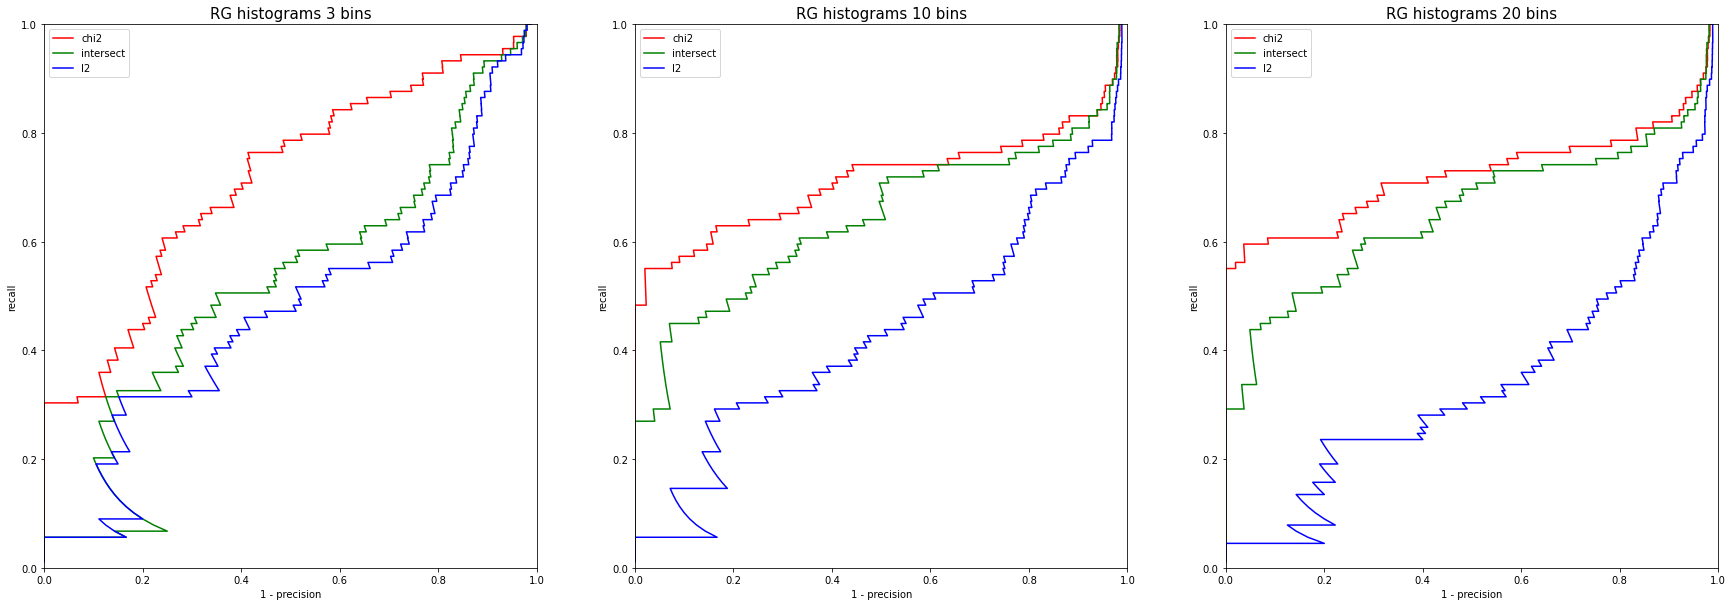

dxdy histograms 3 bins DONE
dxdy histograms 10 bins DONE
dxdy histograms 20 bins DONE


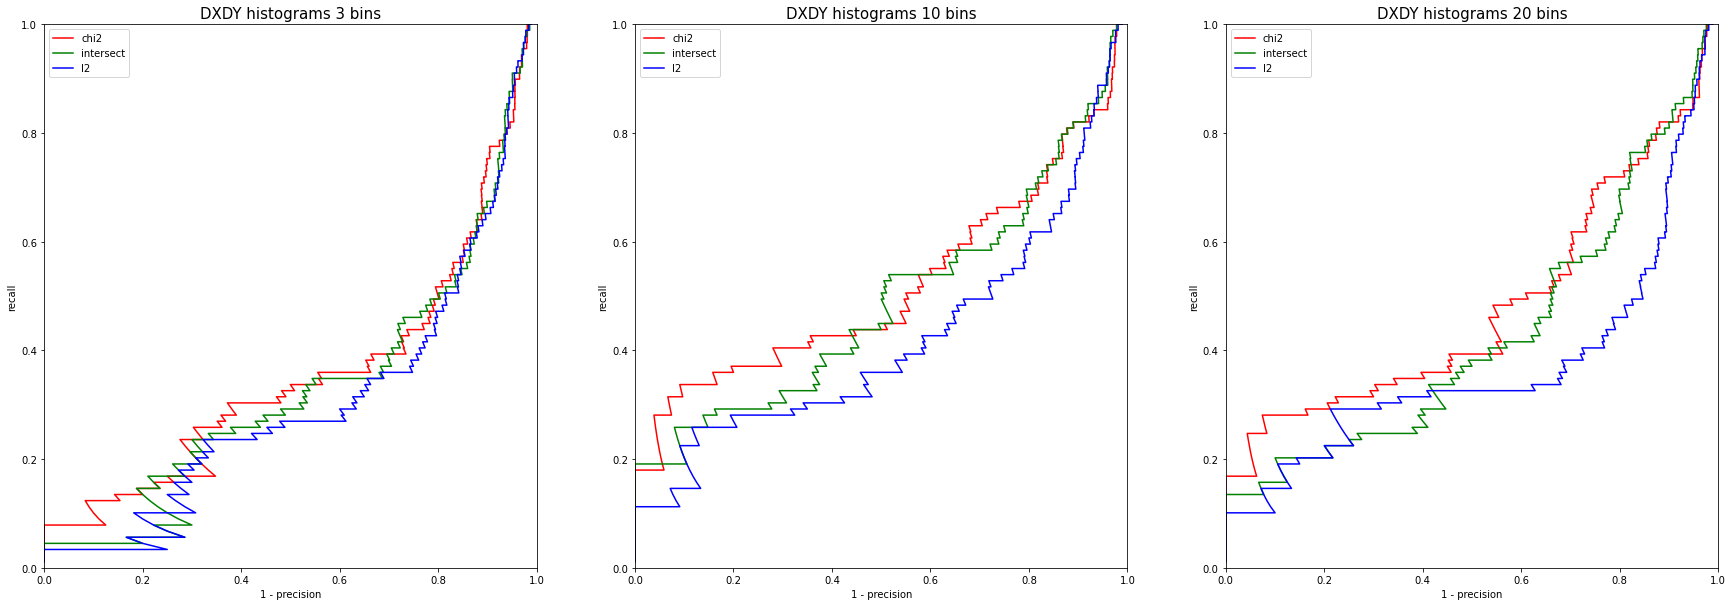

In [56]:
n_bins = [3, 10, 20]
histograms = ['grayvalue', 'rgb', 'rg', 'dxdy']

fig = plt.figure(figsize = (15, 10))    
for histo_type in histograms:
    cc = 1 
    for num_bins in n_bins:
        plt.subplot(1, 3, cc)
        compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], histo_type, num_bins, ['r', 'g', 'b'])
        plt.title('{} histograms {} bins'.format(histo_type.upper(), num_bins), fontsize = 15)
        print('{} histograms {} bins DONE'.format(histo_type, num_bins))
        cc += 1
    plt.savefig('rpcurve_new\{} histograms with {} different bins.png'.format(histo_type.upper(), len(n_bins) ))   
    plt.show()